## Crypto data analysis básico. Bitcoin llegando a 100k

https://x.com/SuarezlledoJ/status/1859538697982496932

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

[*********************100%%**********************]  2 of 2 completed


Volatilidad Anualizada de BTC-USD: 54.33%
Volatilidad Anualizada de ETH-USD: 65.17%


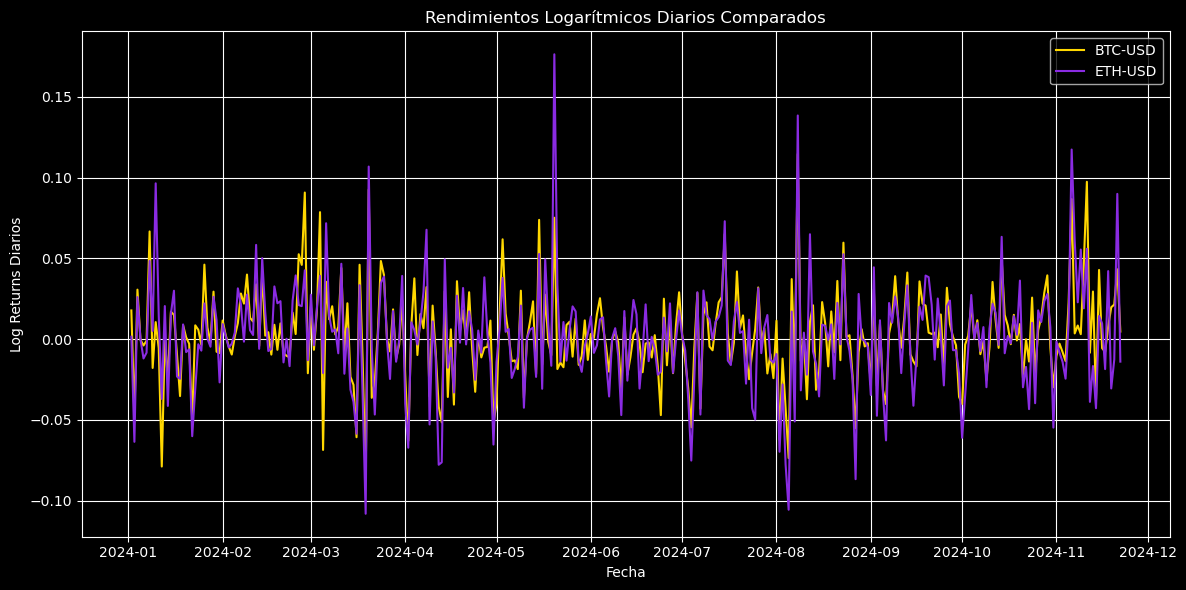

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


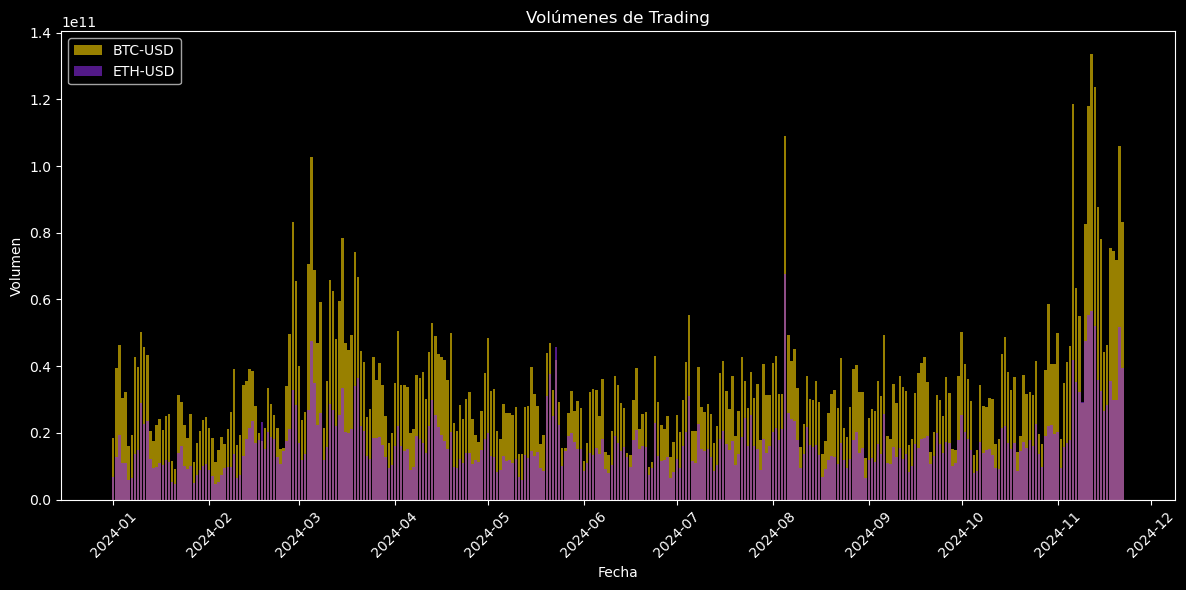

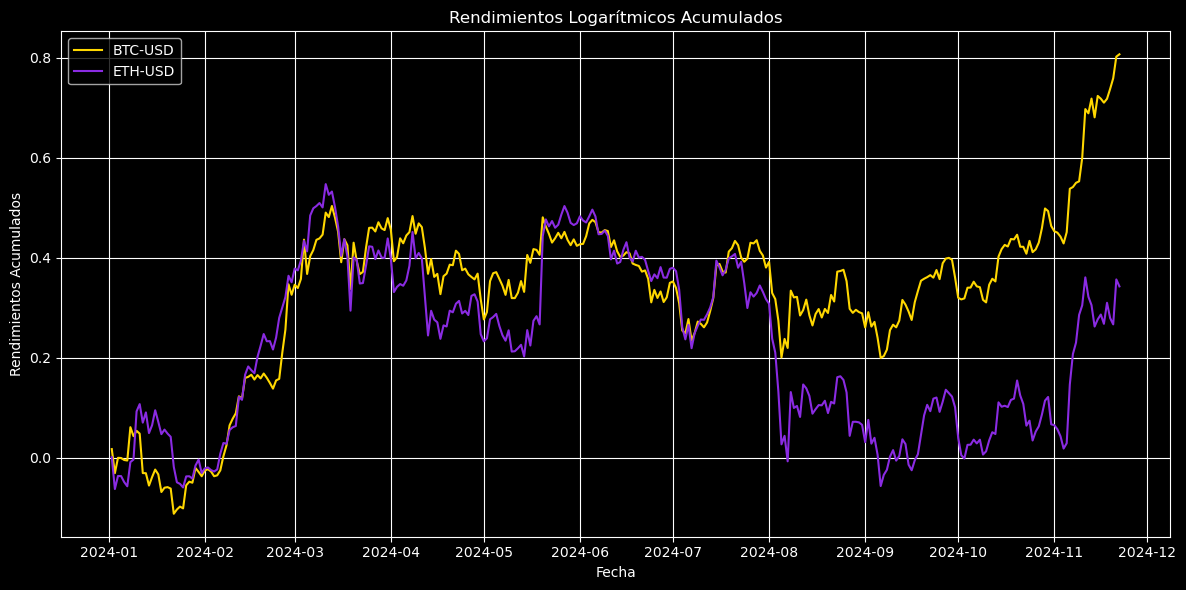

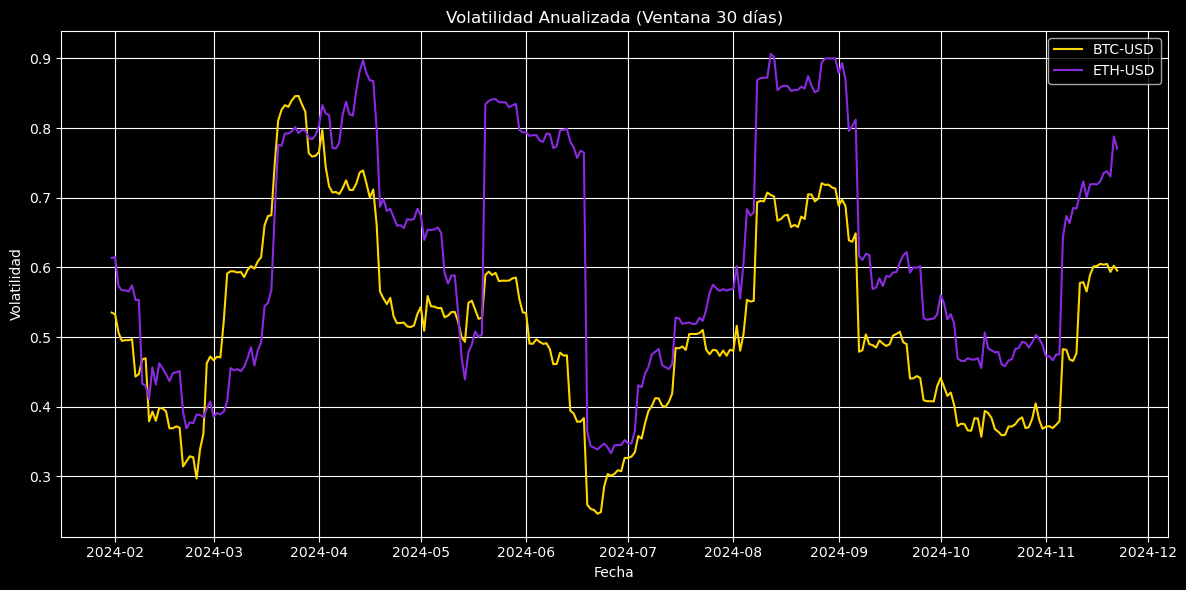

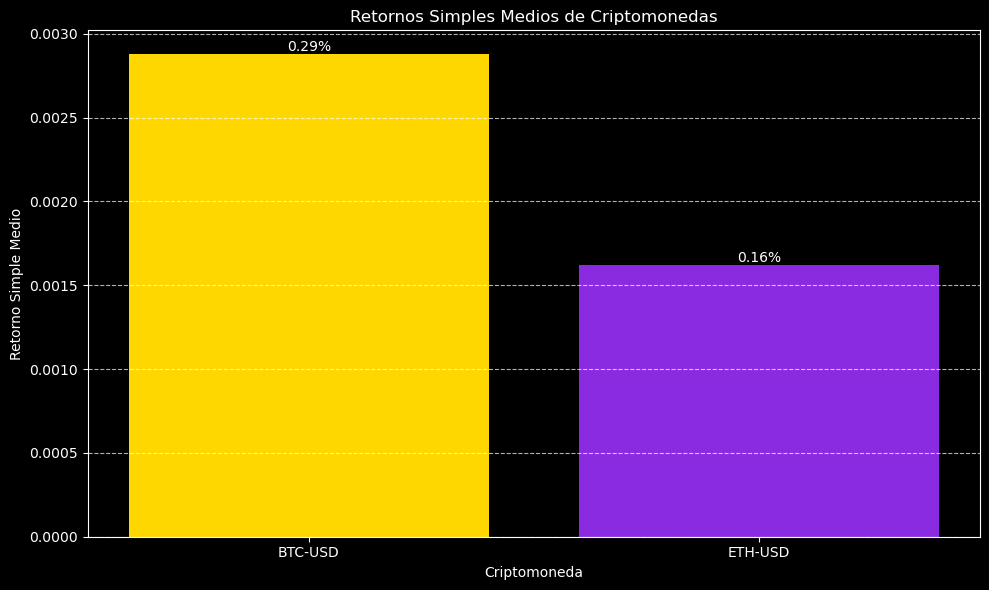

In [13]:
def analizar_cripto(tickers, fecha_inicio='2024-01-01', fecha_fin='2025-01-01'):
    """
    Análisis integral de criptomonedas con múltiples visualizaciones.
    
    Args:
        tickers (list): Símbolos de criptomonedas (por ejemplo, ['BTC-USD', 'ETH-USD'])
        fecha_inicio (str): Fecha de inicio del análisis
        fecha_fin (str): Fecha de fin del análisis
    """
    # Configurar estilo de fondo oscuro
    plt.style.use('dark_background')
    
    # Descargar datos históricos de precios
    datos = yf.download(tickers, start=fecha_inicio, end=fecha_fin)['Adj Close']
    
    # Calcular rendimientos
    rendimientos = datos.pct_change()
    
    # Definir colores para las criptos
    colores = {'BTC-USD': '#FFD700', 'ETH-USD': '#8A2BE2'}
    
    def graficar_log_returns_diarios():
        """
        Grafica los rendimientos logarítmicos diarios comparados de las criptomonedas.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        
        for ticker in tickers:
            # Calcular log returns diarios
            log_returns = np.log(datos[ticker] / datos[ticker].shift(1))
            
            # Graficar log returns
            ax.plot(datos.index, log_returns, 
                    label=ticker, 
                    color=colores.get(ticker, 'gray'))
        
        ax.set_title('Rendimientos Logarítmicos Diarios Comparados')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Log Returns Diarios')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()
    
    def graficar_volumenes():
        """
        Grafica los volúmenes de trading de las criptomonedas.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        for ticker in tickers:
            volumen = yf.download(ticker, start=fecha_inicio, end=fecha_fin)['Volume']
            ax.bar(volumen.index, volumen, 
                   label=ticker, 
                   color=colores.get(ticker, 'gray'), 
                   alpha=0.6)
        ax.set_title('Volúmenes de Trading')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Volumen')
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def graficar_rendimientos_acumulados():
        """
        Grafica los rendimientos logarítmicos acumulados de las criptomonedas.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        for ticker in tickers:
            log_returns = np.log(1 + rendimientos[ticker])
            ax.plot(datos.index, log_returns.cumsum(), 
                    label=ticker, 
                    color=colores.get(ticker, 'gray'))
        ax.set_title('Rendimientos Logarítmicos Acumulados')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Rendimientos Acumulados')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()
    
    def graficar_retornos_simples():
        """
        Grafica los retornos simples de las criptomonedas en un gráfico de barras.
        """
        # Calcular retornos simples
        retornos_simples = datos.pct_change().dropna()
        
        # Retornos simples medios
        retornos_medios = retornos_simples.mean()
        
        # Graficar retornos simples medios
        plt.figure(figsize=(10, 6))
        plt.bar(retornos_medios.index, retornos_medios, 
                color=[colores.get(ticker, 'gray') for ticker in retornos_medios.index])
        plt.title('Retornos Simples Medios de Criptomonedas')
        plt.xlabel('Criptomoneda')
        plt.ylabel('Retorno Simple Medio')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Añadir etiquetas de valores
        for i, v in enumerate(retornos_medios):
            plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

    def graficar_volatilidad():
        """
        Grafica la volatilidad anualizada de las criptomonedas.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        for ticker in tickers:
            volatilidad = rendimientos[ticker].rolling(window=30).std() * np.sqrt(365)
            ax.plot(datos.index, volatilidad, 
                    label=ticker, 
                    color=colores.get(ticker, 'gray'))
        ax.set_title('Volatilidad Anualizada (Ventana 30 días)')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Volatilidad')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Calcular y imprimir volatilidades
    volatilidades = {ticker: rendimientos[ticker].std() * np.sqrt(365) for ticker in tickers}
    for ticker, volatilidad in volatilidades.items():
        print(f"Volatilidad Anualizada de {ticker}: {volatilidad:.2%}")
    
    # Generar visualizaciones
    graficar_log_returns_diarios()
    graficar_volumenes()
    graficar_rendimientos_acumulados()
    graficar_volatilidad()
    graficar_retornos_simples()

# Ejecutar análisis para Bitcoin y Ethereum
analizar_cripto(['BTC-USD', 'ETH-USD'])


## para un periodo semanal

[*********************100%%**********************]  2 of 2 completed


Volatilidad Anualizada Semanal de BTC-USD: 51.62%
Volatilidad Anualizada Semanal de ETH-USD: 65.91%


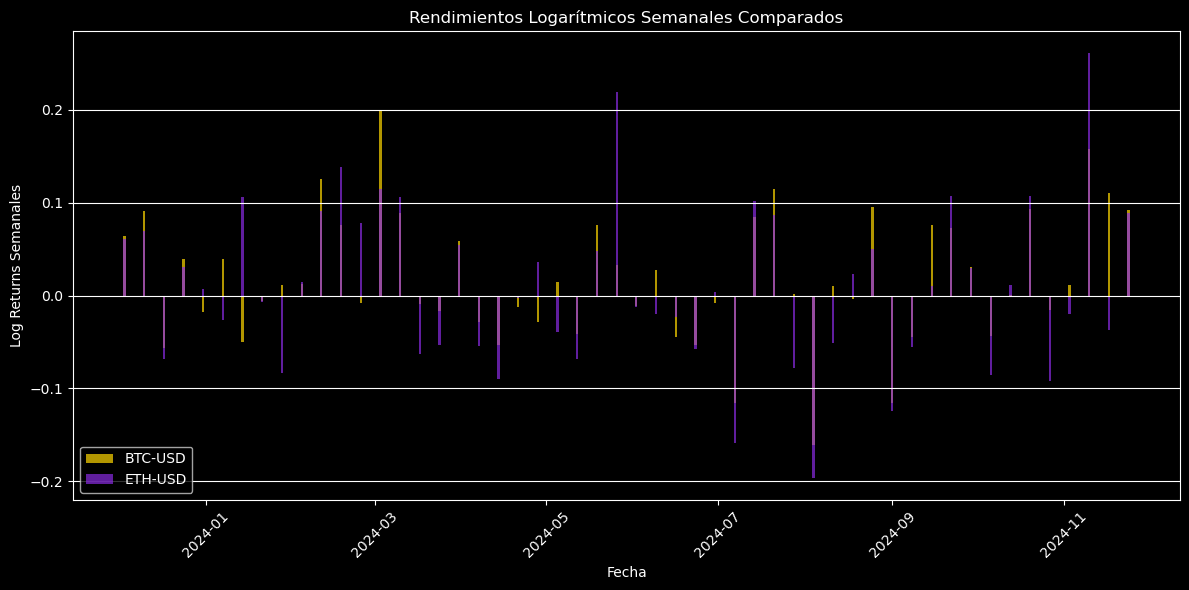

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


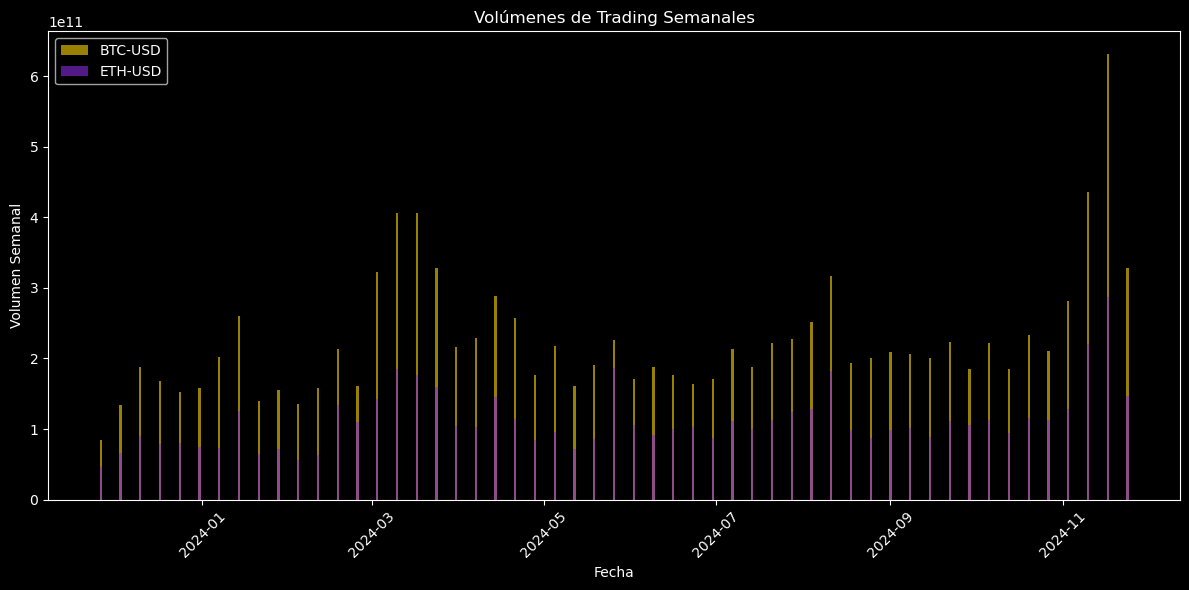

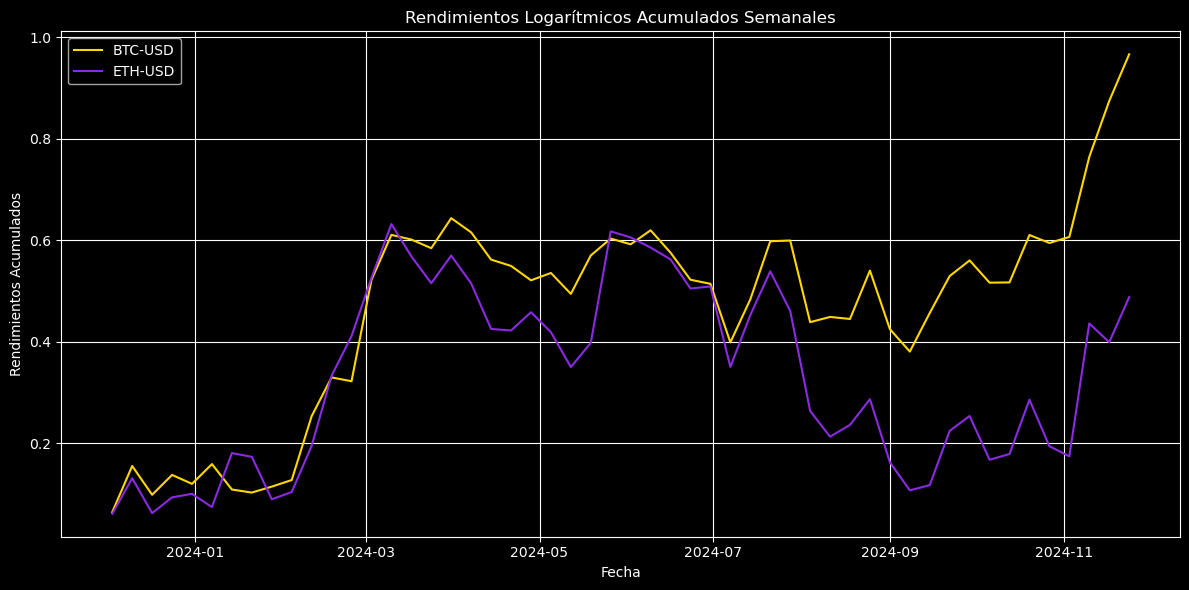

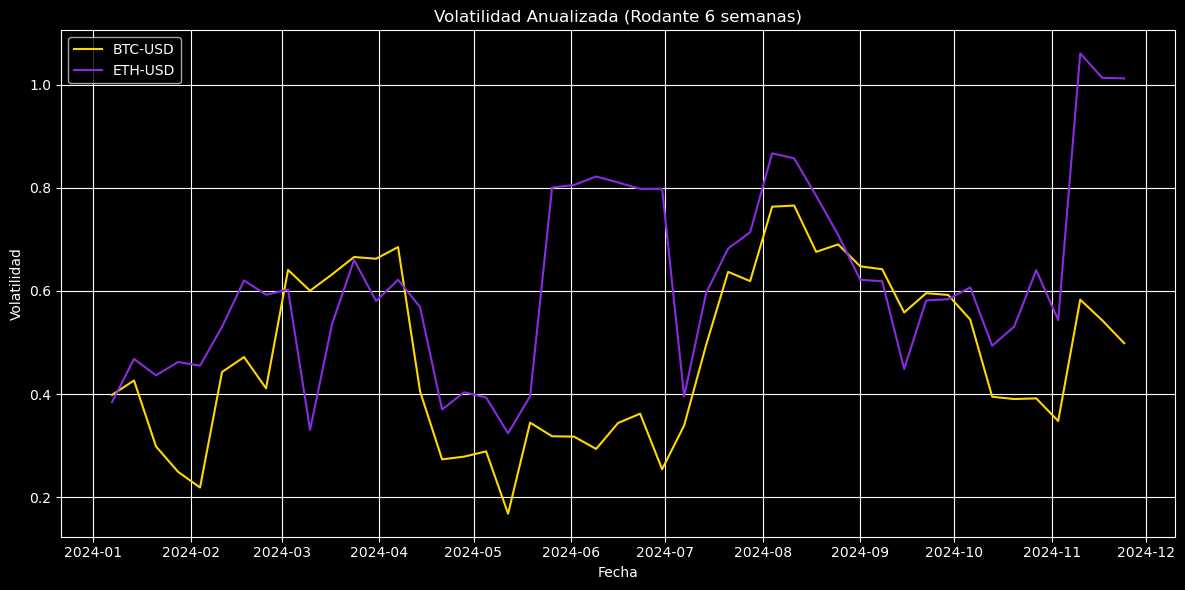

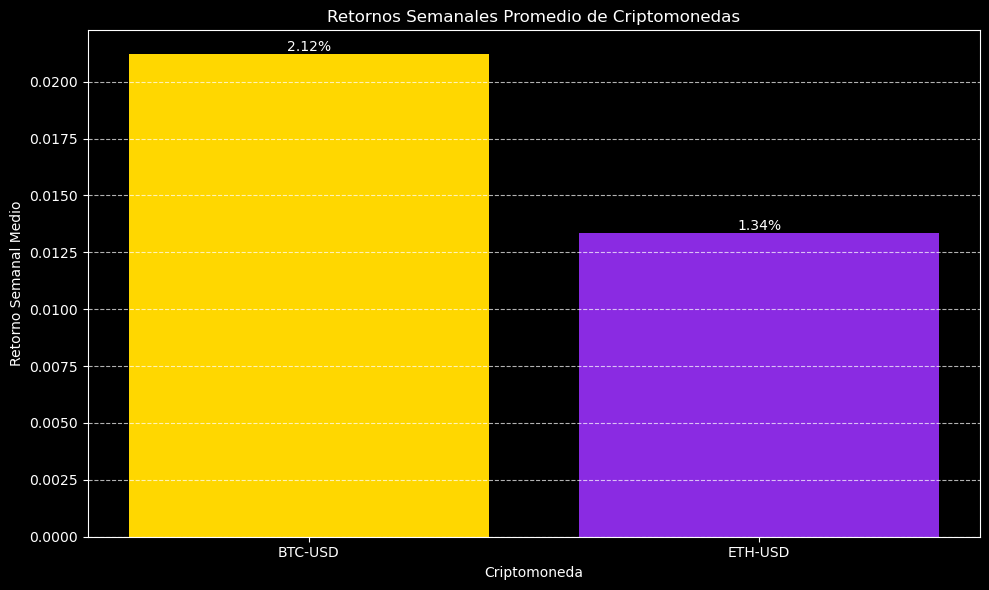

In [14]:
def analizar_cripto_semanal(tickers, fecha_inicio='2023-11-22', fecha_fin='2024-11-22'):
    """
    Análisis integral de criptomonedas con visualizaciones semanales para el último año.
    
    Args:
        tickers (list): Símbolos de criptomonedas (por ejemplo, ['BTC-USD', 'ETH-USD'])
        fecha_inicio (str): Fecha de inicio del análisis (un año atrás desde hoy)
        fecha_fin (str): Fecha de fin del análisis (hoy)
    """
    # Configurar estilo de fondo oscuro
    plt.style.use('dark_background')
    
    # Descargar datos históricos de precios
    datos = yf.download(tickers, start=fecha_inicio, end=fecha_fin)['Adj Close']
    
    # Resamplear a datos semanales
    datos_semanales = datos.resample('W').last()
    
    # Calcular rendimientos semanales
    rendimientos_semanales = datos_semanales.pct_change()
    
    # Definir colores para las criptos
    colores = {'BTC-USD': '#FFD700', 'ETH-USD': '#8A2BE2'}
    
    def graficar_log_returns_semanales():
        """
        Grafica los rendimientos logarítmicos semanales comparados de las criptomonedas.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        
        for ticker in tickers:
            # Calcular log returns semanales
            log_returns = np.log(datos_semanales[ticker] / datos_semanales[ticker].shift(1))
            
            # Graficar log returns
            ax.bar(datos_semanales.index, log_returns, 
                   label=ticker, 
                   color=colores.get(ticker, 'gray'),
                   alpha=0.7)
        
        ax.set_title('Rendimientos Logarítmicos Semanales Comparados')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Log Returns Semanales')
        ax.legend()
        ax.grid(True, axis='y')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def graficar_volumenes_semanales():
        """
        Grafica los volúmenes de trading semanales de las criptomonedas.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        for ticker in tickers:
            # Descargar volúmenes y resamplear semanalmente
            volumen = yf.download(ticker, start=fecha_inicio, end=fecha_fin)['Volume']
            volumen_semanal = volumen.resample('W').sum()
            
            ax.bar(volumen_semanal.index, volumen_semanal, 
                   label=ticker, 
                   color=colores.get(ticker, 'gray'), 
                   alpha=0.6)
        ax.set_title('Volúmenes de Trading Semanales')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Volumen Semanal')
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    def graficar_rendimientos_acumulados_semanales():
        """
        Grafica los rendimientos logarítmicos acumulados semanales de las criptomonedas.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        for ticker in tickers:
            log_returns = np.log(1 + rendimientos_semanales[ticker])
            ax.plot(datos_semanales.index, log_returns.cumsum(), 
                    label=ticker, 
                    color=colores.get(ticker, 'gray'))
        ax.set_title('Rendimientos Logarítmicos Acumulados Semanales')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Rendimientos Acumulados')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()
    
    def graficar_retornos_semanales_promedio():
        """
        Grafica los retornos semanales promedio de las criptomonedas.
        """
        # Calcular retornos semanales promedio
        retornos_semanales_promedio = rendimientos_semanales.mean()
        
        # Graficar retornos semanales promedio
        plt.figure(figsize=(10, 6))
        plt.bar(retornos_semanales_promedio.index, retornos_semanales_promedio, 
                color=[colores.get(ticker, 'gray') for ticker in retornos_semanales_promedio.index])
        plt.title('Retornos Semanales Promedio de Criptomonedas')
        plt.xlabel('Criptomoneda')
        plt.ylabel('Retorno Semanal Medio')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Añadir etiquetas de valores
        for i, v in enumerate(retornos_semanales_promedio):
            plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

    def graficar_volatilidad_semanal():
        """
        Grafica la volatilidad anualizada basada en returns semanales.
        """
        fig, ax = plt.subplots(figsize=(12, 6))
        for ticker in tickers:
            # Calcular volatilidad rodante de 6 semanas y anualizarla
            volatilidad = rendimientos_semanales[ticker].rolling(window=6).std() * np.sqrt(52)
            ax.plot(datos_semanales.index, volatilidad, 
                    label=ticker, 
                    color=colores.get(ticker, 'gray'))
        ax.set_title('Volatilidad Anualizada (Rodante 6 semanas)')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Volatilidad')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Calcular y imprimir volatilidades semanales
    volatilidades = {ticker: rendimientos_semanales[ticker].std() * np.sqrt(52) for ticker in tickers}
    for ticker, volatilidad in volatilidades.items():
        print(f"Volatilidad Anualizada Semanal de {ticker}: {volatilidad:.2%}")
    
    # Generar visualizaciones
    graficar_log_returns_semanales()
    graficar_volumenes_semanales()
    graficar_rendimientos_acumulados_semanales()
    graficar_volatilidad_semanal()
    graficar_retornos_semanales_promedio()

# Ejecutar análisis para Bitcoin y Ethereum
analizar_cripto_semanal(['BTC-USD', 'ETH-USD'])